In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import pandas as pd
import numpy as np
import itertools
import zipfile
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
#zf = zipfile.ZipFile('../data/fake_or_real_news.csv.zip') 
#newsDf = pd.read_csv(zf.open('fake_or_real_news.csv'),encoding='ISO-8859-1')

filename = "../data/fake_or_real_news.csv"
with open(filename,'rb') as f:
    lines = f.read()
new = str(lines,'utf-8')
with open('clear','w') as f2:
    f2.write(new)
newsDf = pd.read_csv("clear")
print("rows & lines: ", newsDf.shape)

rows & lines:  (6335, 4)


In [14]:
newsDf.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [15]:
newsDf = newsDf.set_index('Unnamed: 0')
newsDf.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [16]:
# Extract the Data
y = newsDf.label
newsDf = newsDf.drop('label', axis=1)
xTrain, xTest, yTrain, yTest = train_test_split(newsDf['text'], y, test_size=0.30, random_state=53)

In [17]:
# Build Vectorizer Classifiers
countVectorizer = CountVectorizer(stop_words='english')
countTrain = countVectorizer.fit_transform(xTrain)
countTest = countVectorizer.transform(xTest)

# Build TF-IDF
tfidfVectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidfTrain = tfidfVectorizer.fit_transform(xTrain)
tfidfTest = tfidfVectorizer.transform(xTest)

In [26]:
print(tfidfVectorizer.get_feature_names()[-10:])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


In [19]:
countVectorizer.get_feature_names()[:10]

['00',
 '000',
 '0000',
 '00000031',
 '000035',
 '00006',
 '0001',
 '0001pt',
 '000billion',
 '000ft']

In [20]:
countDf = pd.DataFrame(countTrain.A, columns=countVectorizer.get_feature_names())
tfidfDf = pd.DataFrame(tfidfTrain.A, columns=tfidfVectorizer.get_feature_names())
difference = set(countDf.columns) - set(tfidfDf.columns)
difference

set()

In [21]:
print(countDf.equals(tfidfDf))

False


In [22]:
countDf.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000billion,000ft,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
tfidfDf.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000billion,000ft,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.041696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.031448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.014377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


accuracy:   0.863
Confusion matrix, without normalization


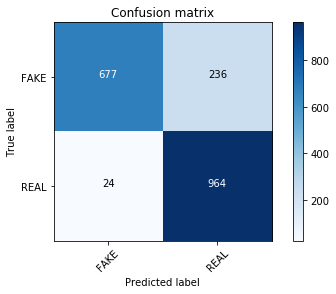

In [24]:
# Compare the Models
# print and plot the confusion matrix
# normalize=True for normalization
# count vectorized training set countTrain is outperforming TF-IDF vectors
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

clf = MultinomialNB()
clf.fit(tfidfTrain, yTrain)
pred = clf.predict(tfidfTest)
score = metrics.accuracy_score(yTest, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(yTest, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.902
Confusion matrix, without normalization


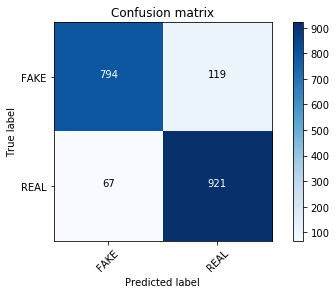

In [25]:
clf = MultinomialNB()
clf.fit(countTrain, yTrain)
pred = clf.predict(countTest)
score = metrics.accuracy_score(yTest, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(yTest, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

ValueError: could not convert string to float: 'Top officials of the Cruz campaign are convinced there is one specific step that could have stopped Trump -- and they blame Sen. Marco Rubio for not taking that step.\n\nIn early March, it became clear that Trump was well on his way to the nomination and would even likely defeat Rubio in his home state of Florida\'s March 15 primary. According to several sources close to Cruz, the Cruz campaign conducted several secret polls to see what the impact would be if Rubio joined Cruz as his running mate, with Cruz at the top of the ticket.\n\nPolitico reported in March that Rubio rejected the idea of a "unity ticket." But the sources close to Cruz and Rubio are now offering a much fuller picture of the extent of Cruz\'s polling, the reasons why Rubio said no, and the resentment the Cruz people have about Rubio\'s rejection of the idea.\n\nThe Cruz campaign polled in three March 15 primary states, Illinois, Missouri and North Carolina -- though not in Ohio, home to Kasich, or in Florida.\n\nThey also tested the matchup in a poll in Arizona, which would hold its contest on March 22, and in Wisconsin, which would hold its primary on April 5. What did polls suggest a Cruz-Rubio ticket would do in those states? "Blowout," said a source close to Cruz. "65%-35%," with Trump losing. Through friends and emissaries, the Cruz campaign tried to get Rubio on board. But Cruz could not reach him on the phone, and others reported back to the Cruz campaign that Rubio did not seem interested in having a discussion about this at all. "He went off the grid," said a source close to Cruz. Cruz campaign officials speculated that Rubio was interested in preserving his political viability for a contested GOP convention or the 2020 race. A source familiar with Rubio\'s thinking says there never really was a concrete offer from the Cruz campaign to team up -- just vague discussions from donors about polls and the potential for such a move -- but either way, he was not interested. For one, the source said, Rubio thought the notion of two senators from Washington, D.C., teaming up against Trump would fit all too easily into the Trump outsider narrative. Second, Rubio was concerned that as a fellow Cuban-American freshman senator, he didn\'t think he complemented Cruz particularly well. Lastly, Rubio felt that the nominee should have the freedom to pick whomever he or she wants at the convention to help win in November and not be bound to a short-term decision made in the thick of the primaries. The lack of bounce after Cruz attempted such a move with Carly Fiorina reinforced his belief that he was right, the source said. A source close to Kasich reported that the Ohio governor tried to broach the subject with Rubio as well, and the campaigns discussed it as well, before and after the March 8 Michigan primary. Kasich\'s team did not conduct any polling but they are also convinced if the two men had teamed up, "we would have swept the rest of the primaries." What the result would have been in these alternate universes where a Cruz-Rubio ticket was on the ballot, or a Kasich-Rubio team, is unknown. Trump, in this reality went on to win in Florida, Illinois, Missouri, North Carolina, and Arizona. He was not stopped.'